In [1]:
import pandas as pd
import os
from get_repo_name import get_repo_name
from glob import glob
from shutil import copy

results_path = './results/'
cat_datasets = 'top_repos_by_star_count_datasets'
dst = results_path + cat_datasets + '/'

if cat_datasets not in os.listdir(results_path):
    os.mkdir ( dst )

cat_path = './top_repos/top_repos_by_star_count/'

for repo in os.listdir(cat_path):

    repo_name = get_repo_name ( os.path.basename ( repo ) )
    datasets_path = '/datasets/'
    csv_file = f'{ repo_name }_final.csv'
    if csv_file in os.listdir ( cat_path + repo + datasets_path ):
        src = cat_path + repo + datasets_path + csv_file
        copy ( src, dst )

In [2]:
date_df = pd.DataFrame ( columns = ['repo_name', 'start_date', 'end_date'] )

for csv in os.listdir ( dst ):
    
    if '_final.csv' in csv:
        temp_df = pd.read_csv ( dst + csv )
        repo_name = csv.replace('_final.csv','')
        start_date = temp_df.year_month.iloc[0]
        end_date = temp_df.year_month.iloc[-1]

        append_list = [ repo_name, start_date, end_date ]
        append_series = pd.Series ( append_list, index = date_df.columns )
        date_df = date_df.append ( append_series, ignore_index=True )

date_df

,repo_name,start_date,end_date
0,996.ICU,2019-03,2022-01
1,awesome,2014-07,2022-07
2,bootstrap,2011-04,2022-07
3,build-your-own-x,2018-05,2022-07
4,coding-interview-university,2016-06,2022-07
5,CS-Notes,2018-02,2022-02
6,developer-roadmap,2017-03,2022-07
7,flutter,2014-10,2022-07
8,free-programming-books,2013-10,2022-07
9,gitignore,2010-11,2022-05


In [3]:
max_start_date = date_df.start_date.max()
date_df [ date_df.start_date == date_df.start_date.max() ]

,repo_name,start_date,end_date
0,996.ICU,2019-03,2022-01


In [4]:
min_end_date = date_df.end_date.min()
date_df [ date_df.end_date == date_df.end_date.min() ]

,repo_name,start_date,end_date
0,996.ICU,2019-03,2022-01


In [5]:
glob_path = os.path.join ( dst, "*_final.csv" )
master_dataset = glob ( glob_path )

df = pd.concat ( map ( pd.read_csv, master_dataset ), ignore_index = True )
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2019-03,531,12006,2191,435.0,28.0,2178.0,0.041040,0.558140,1.000000
1,2019-04,1000,12846,22386,617.0,76.0,3379.0,0.652796,0.325916,0.172932
2,2019-05,67,465,417,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2019-06,10,24,6,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2019-07,24,33,19,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1558,2022-03,1,6,6,0.0,0.0,0.0,0.000000,0.000000,0.000000
1559,2022-04,2,14,13,0.0,0.0,0.0,0.000000,0.000000,0.000000
1560,2022-05,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1561,2022-06,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [6]:
df.drop ( df[df.year_month < max_start_date].index, inplace = True )
df.drop ( df[df.year_month > min_end_date].index, inplace = True )
df.reset_index ( drop = True, inplace = True )
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2019-03,531,12006,2191,435.0,28.0,2178.0,0.041040,0.558140,1.000000
1,2019-04,1000,12846,22386,617.0,76.0,3379.0,0.652796,0.325916,0.172932
2,2019-05,67,465,417,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2019-06,10,24,6,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2019-07,24,33,19,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
625,2021-09,3,15,3,0.0,0.0,0.0,0.000000,0.000000,0.000000
626,2021-10,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000
627,2021-11,1,0,8,0.0,0.0,0.0,0.000000,0.000000,0.000000
628,2021-12,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [7]:
grouped_df = df.groupby(['year_month']).agg({
    
    'commit_count': 'sum', 
    'additions': 'sum', 
    'deletions': 'sum',
    'agg_loc': 'sum',
    'agg_complexity': 'sum',
    'agg_token_count': 'sum',
    'dmm_unit_size': 'mean',
    'dmm_unit_complexity': 'mean',
    'dmm_unit_interfacing': 'mean'
} ).reset_index(level=[0])

grouped_df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2019-03,1463,199577,195719,603717.0,135190.0,3691121.0,0.253957,0.307983,0.340482
1,2019-04,2123,175143,108045,516865.0,41618.0,2436147.0,0.233298,0.254309,0.247301
2,2019-05,1006,126557,72391,444268.0,37826.0,2078179.0,0.076269,0.112956,0.118965
3,2019-06,856,95928,62255,474096.0,38822.0,2154624.0,0.173951,0.167534,0.156176
4,2019-07,846,144042,67365,404913.0,51295.0,2176414.0,0.160311,0.150703,0.143063
5,2019-08,940,150631,116693,507661.0,55942.0,2481391.0,0.220907,0.196536,0.186329
6,2019-09,712,65599,32360,237949.0,18029.0,1077472.0,0.144511,0.200687,0.186040
7,2019-10,1087,99888,61416,245188.0,32967.0,1302651.0,0.120043,0.171658,0.172693
8,2019-11,862,112689,59275,132850.0,18521.0,739741.0,0.157791,0.190643,0.192638
9,2019-12,637,65126,43597,472068.0,68805.0,2448622.0,0.130921,0.120240,0.172916


In [8]:
for idx in range(1, 10):
    ma_prefix = 'ma_'
    grouped_df[ma_prefix + grouped_df.columns[idx]] = grouped_df[grouped_df.columns[idx]].rolling ( window = 3 ).mean()
grouped_df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing,ma_commit_count,ma_additions,ma_deletions,ma_agg_loc,ma_agg_complexity,ma_agg_token_count,ma_dmm_unit_size,ma_dmm_unit_complexity,ma_dmm_unit_interfacing
0,2019-03,1463,199577,195719,603717.0,135190.0,3691121.0,0.253957,0.307983,0.340482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04,2123,175143,108045,516865.0,41618.0,2436147.0,0.233298,0.254309,0.247301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05,1006,126557,72391,444268.0,37826.0,2078179.0,0.076269,0.112956,0.118965,1530.666667,167092.333333,125385.000000,521616.666667,71544.666667,2.735149e+06,0.187841,0.225082,0.235583
3,2019-06,856,95928,62255,474096.0,38822.0,2154624.0,0.173951,0.167534,0.156176,1328.333333,132542.666667,80897.000000,478409.666667,39422.000000,2.222983e+06,0.161173,0.178266,0.174147
4,2019-07,846,144042,67365,404913.0,51295.0,2176414.0,0.160311,0.150703,0.143063,902.666667,122175.666667,67337.000000,441092.333333,42647.666667,2.136406e+06,0.136844,0.143731,0.139401
5,2019-08,940,150631,116693,507661.0,55942.0,2481391.0,0.220907,0.196536,0.186329,880.666667,130200.333333,82104.333333,462223.333333,48686.333333,2.270810e+06,0.185056,0.171591,0.161856
6,2019-09,712,65599,32360,237949.0,18029.0,1077472.0,0.144511,0.200687,0.186040,832.666667,120090.666667,72139.333333,383507.666667,41755.333333,1.911759e+06,0.175243,0.182642,0.171811
7,2019-10,1087,99888,61416,245188.0,32967.0,1302651.0,0.120043,0.171658,0.172693,913.000000,105372.666667,70156.333333,330266.000000,35646.000000,1.620505e+06,0.161820,0.189627,0.181688
8,2019-11,862,112689,59275,132850.0,18521.0,739741.0,0.157791,0.190643,0.192638,887.000000,92725.333333,51017.000000,205329.000000,23172.333333,1.039955e+06,0.140782,0.187663,0.183791
9,2019-12,637,65126,43597,472068.0,68805.0,2448622.0,0.130921,0.120240,0.172916,862.000000,92567.666667,54762.666667,283368.666667,40097.666667,1.497005e+06,0.136252,0.160847,0.179416


In [9]:
grouped_df.to_csv ( f'{results_path}{cat_datasets[:24]}aggregated.csv', index = False )

# Analysis

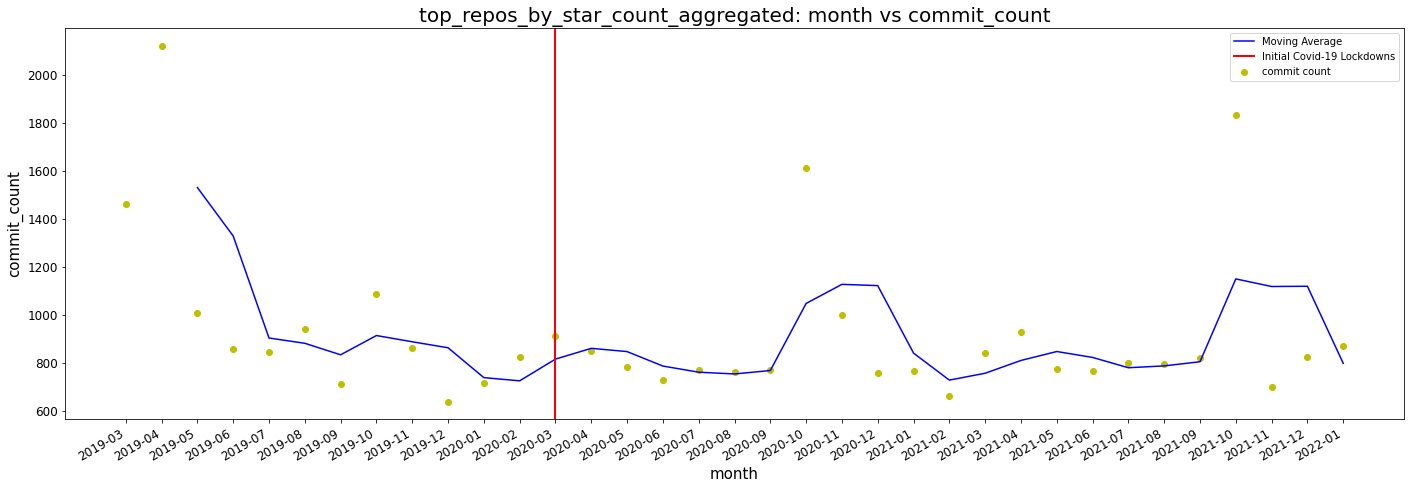

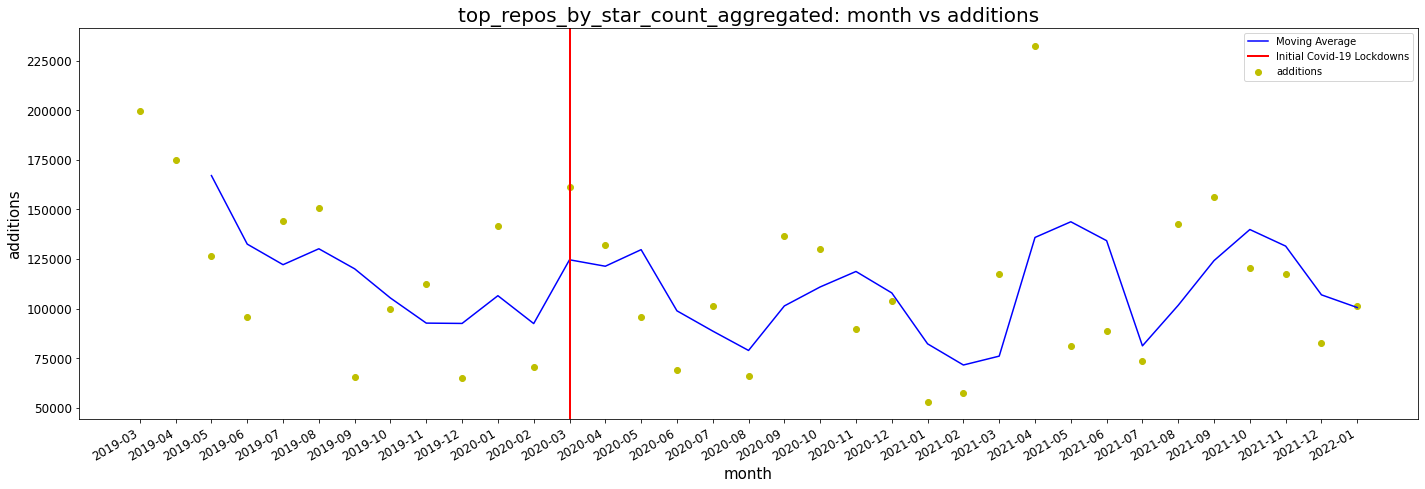

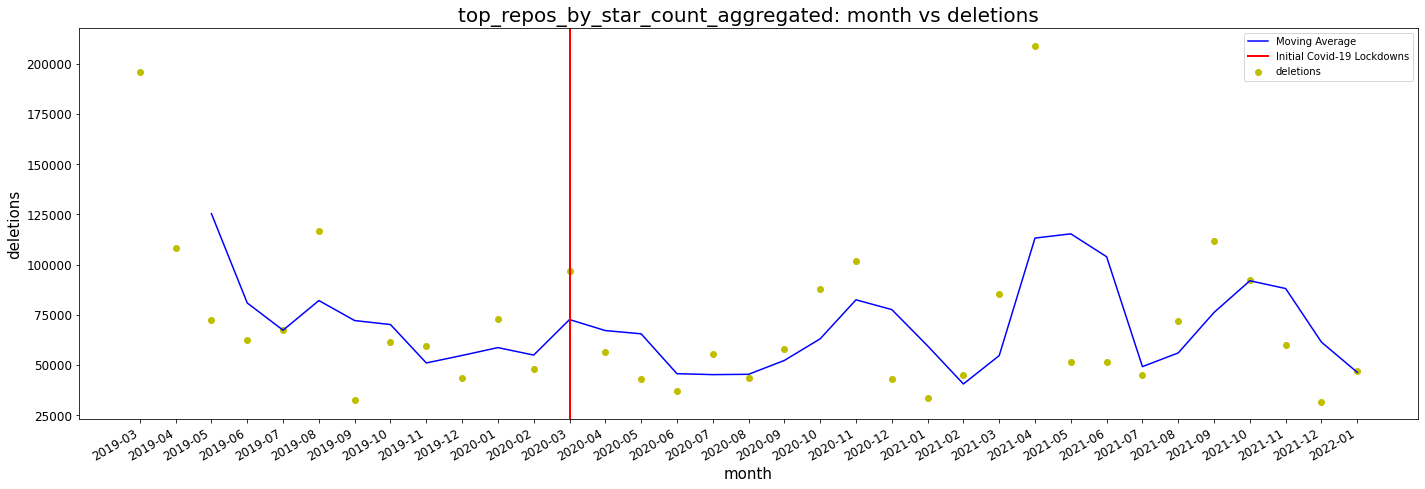

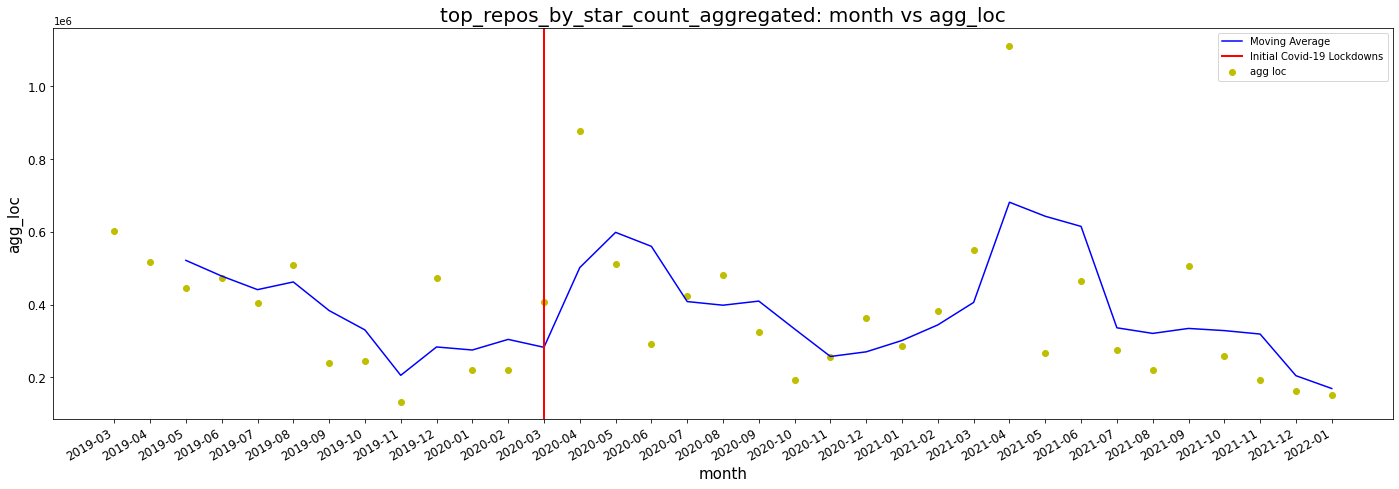

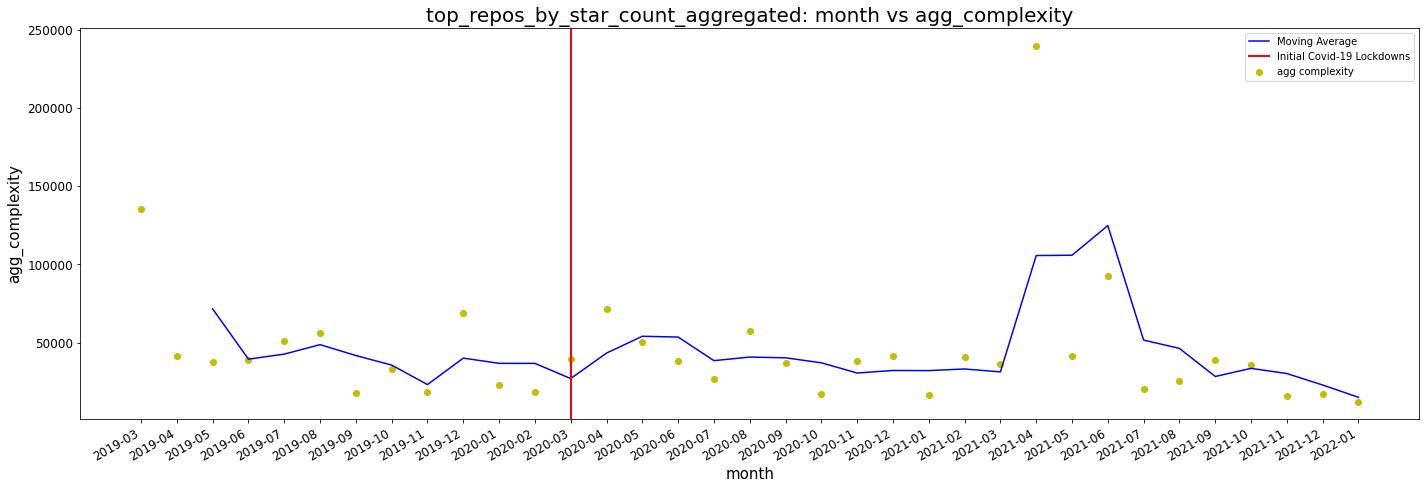

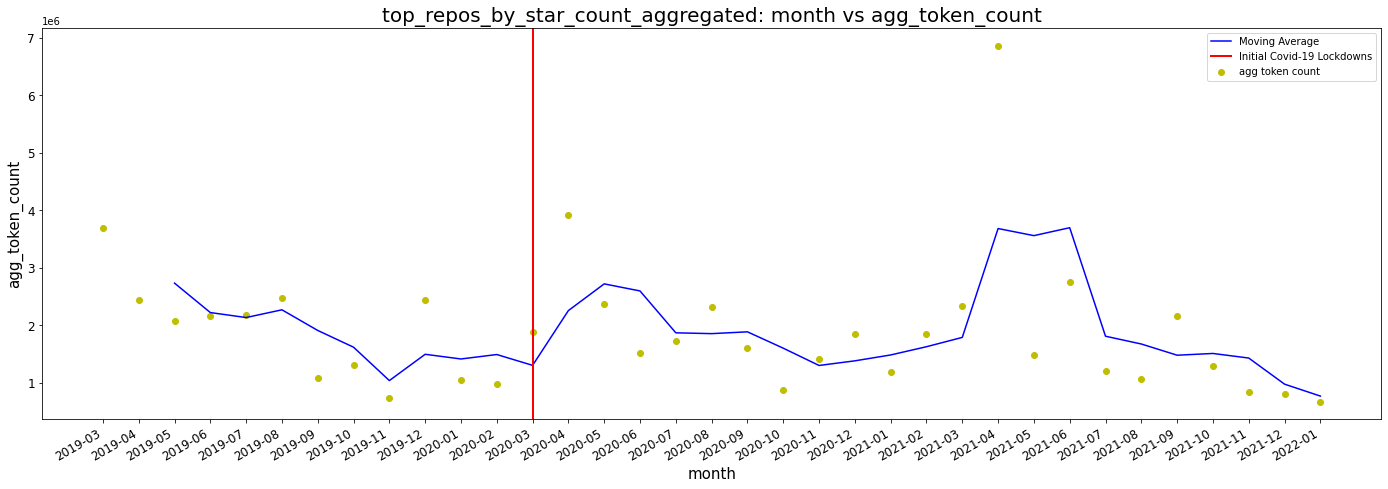

In [10]:
cat_images = 'top_repos_by_star_count_images'
images_path = results_path + cat_images + '/'
plot_name = 'top_repos_by_star_count_aggregated'

if cat_images not in os.listdir(results_path):
    os.mkdir ( images_path )

from plot_line_lib import plot_line

for idx in range ( 1, 7 ):
    plot_line ( grouped_df.columns[idx], idx, grouped_df, images_path, plot_name, major_locator = False )

In [11]:
from analysis_lib import year_pre_covid_ym, pre_covid_ym, covid_ym, year_post_covid_ym

grouped_df = grouped_df.set_index(grouped_df['year_month'])


df1 = grouped_df [ year_pre_covid_ym : pre_covid_ym ]
# df2 = grouped_df [ covid_ym : str(grouped_df.year_month[-1]) ]
df2 = grouped_df [ covid_ym : year_post_covid_ym ]
df1 = df1.reset_index ( drop = True )
df2 = df2.reset_index ( drop = True )

df1.shape, df2.shape

((12, 19), (12, 19))

In [12]:
from analysis_lib import calc_and_compare_means

calc_and_compare_means ( df1, df2 )

Pre and Post-Covid Mean Comparisons:
commit count :  1006  vs  863  ->  Down (14.2%)
additions :  120629  vs  99765  ->  Down (17.3%)
deletions :  78363  vs  58480  ->  Down (25.4%)
agg loc :  373344  vs  399552  ->  Up (7.0%)
agg complexity :  45031  vs  39634  ->  Down (12.0%)
agg token count :  1884715  vs  1877377  ->  Down (0.4%)


# Distribution

In [13]:
from analysis_lib import get_equilibrium_pc

print("Pre-pandemic equilibrium percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df1.columns[idx]} = { get_equilibrium_pc ( list ( df1[df1.columns[idx]] ) ) }' )
    
print("\nPost-pandemic equilibrium percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df2.columns[idx]} = { get_equilibrium_pc ( list ( df2[df2.columns[idx]] ) ) }' )

Pre-pandemic equilibrium percentages:
commit_count = 41.7
additions = 41.7
deletions = 33.3
agg_loc = 41.7
agg_complexity = 33.3
agg_token_count = 41.7

Post-pandemic equilibrium percentages:
commit_count = 50.0
additions = 41.7
deletions = 41.7
agg_loc = 41.7
agg_complexity = 41.7
agg_token_count = 41.7


In [14]:
from analysis_lib import get_pareto_pc

print("Pre-pandemic pareto percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df1.columns[idx]} = { get_pareto_pc ( list ( df1[df1.columns[idx]] ) ) }' )
    
print("\nPost-pandemic pareto percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df2.columns[idx]} = { get_pareto_pc ( list ( df2[df2.columns[idx]] ) ) }' )

Pre-pandemic pareto percentages:
commit_count = 75.0
additions = 75.0
deletions = 66.7
agg_loc = 66.7
agg_complexity = 66.7
agg_token_count = 66.7

Post-pandemic pareto percentages:
commit_count = 80.0
additions = 75.0
deletions = 75.0
agg_loc = 75.0
agg_complexity = 75.0
agg_token_count = 75.0


In [15]:
pre_cpl = df1.agg_complexity.sum()/df1.agg_loc.sum()
post_cpl = df2.agg_complexity.sum()/df2.agg_loc.sum()
change_perc = (post_cpl - pre_cpl) / 100
change_perc

-0.00021419390580309768